> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Questions;

1. What is the handgun, long gun and all guns per capita in 2010 and 2016?
2. What has been the trends of gun purchases (handgun,long_gun,totals) over the years?
3. What is the trend of Guns across 2017,2016 and 2015 ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline 


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.reset_option('display.max_rows')

gun_df = pd.read_csv(r'C:\Users\gabri\Downloads\Compressed\ncis-and-census-data\gun_data.csv')
census_df = pd.read_csv(r'C:\Users\gabri\Downloads\Compressed\ncis-and-census-data\U.S. Census Data.csv')

In [3]:
#gun_df.head(10);
census_df.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [4]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    


### Data Cleaning 
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
gun_df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [8]:
#count number of states in gun data and store them in a variable 
#gun_df.state.nunique()
states_gun = gun_df.state.unique()

In [9]:
#get states in census data
states_cen = np.array(census_df.columns)

In [10]:
#delete index 0 and 1 to get only states
states_cen = np.delete(states_cen,[0,1])

In [11]:
states_gun

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
#store states not in both data as del_states
del_states = np.setdiff1d(states_gun,states_cen)
print(del_states)

['District of Columbia' 'Guam' 'Mariana Islands' 'Puerto Rico'
 'Virgin Islands']


In [13]:
#delete del_states from gun_data
gun_df = gun_df.query('state not in @del_states')
gun_df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [14]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   state                      11350 non-null  object 
 2   permit                     11348 non-null  float64
 3   permit_recheck             1000 non-null   float64
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   admin                      11348 non-null  float64
 9   prepawn_handgun            9597 non-null   float64
 10  prepawn_long_gun           9595 non-null   float64
 11  prepawn_other              4650 non-null   float64
 12  redemption_handgun         9600 non-null   float64
 13  redemption_long_gun        9598 non-null   flo

In [15]:
un_col = ['permit', 'permit_recheck', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']

drop_col = pd.Series(un_col)

In [16]:
drop_col

0                        permit
1                permit_recheck
2                         other
3                      multiple
4                         admin
5               prepawn_handgun
6              prepawn_long_gun
7                 prepawn_other
8            redemption_handgun
9           redemption_long_gun
10             redemption_other
11             returned_handgun
12            returned_long_gun
13               returned_other
14              rentals_handgun
15             rentals_long_gun
16         private_sale_handgun
17        private_sale_long_gun
18           private_sale_other
19     return_to_seller_handgun
20    return_to_seller_long_gun
21       return_to_seller_other
dtype: object

In [22]:
#drop unneccessary columns 
gun_df_new = gun_df.drop(drop_col, axis = 1)

In [23]:
#check to see 
gun_df_new.head()

,month,state,handgun,long_gun,totals
0,2017-09,Alabama,5734.0,6320.0,32019
1,2017-09,Alaska,2320.0,2930.0,6303
2,2017-09,Arizona,11063.0,7946.0,28394
3,2017-09,Arkansas,4347.0,6063.0,17747
4,2017-09,California,37165.0,24581.0,123506


In [25]:
gun_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     11350 non-null  object 
 1   state     11350 non-null  object 
 2   handgun   11350 non-null  float64
 3   long_gun  11350 non-null  float64
 4   totals    11350 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ KB


I am converting the month variable to a date so it can help me with my analysis, source https://datatofish.com/strings-to-datetime-pandas/

In [26]:
#convert month to date 
gun_df_new['month'] = pd.to_datetime(gun_df_new['month'] )

In [27]:
#check to confirm changes 
gun_df_new.head()

,month,state,handgun,long_gun,totals
0,2017-09-01,Alabama,5734.0,6320.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,17747
4,2017-09-01,California,37165.0,24581.0,123506


In [28]:
#check details of census data
census_df.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


The content in the census data looks disarranged for me and I think it will be best for my analysis if put all state as a column, in excel I would use the transpose to do. I googled to get how to transpose, source- https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php

In [29]:
#fact Note is not necessary so drop
census_df = census_df.drop(['Fact Note'], axis = 1);
census_df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [30]:
census_df = census_df.transpose().reset_index()
#my transpose did not work, because what I realize after the transpose is 
#I get a lot of null values after I transpose the data

In [31]:
census_df.head()

,index,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#remove all irrelevant columns
census_df = census_df.iloc[:,:66]

In [33]:
#check to confirm
census_df.head()

#after I checked, I need to replace column headers with first row

,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [34]:
header = np.array(census_df.iloc[0])
#header
census_df = census_df[1:]
census_df.columns = header

In [35]:
#check to confirm changes
census_df.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [36]:
census_df.columns

Index(['Fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 201

In [37]:
#change fact to States
census_df.rename(columns = {'Fact':'states'}, inplace = True)

In [38]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   states                                                                                  50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [39]:
census_df.columns

Index(['states', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2

In [40]:
census_df.head()

,states,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [41]:
#change some column names
census_df.rename(columns = {'States':'states','Population estimates, July 1, 2016,  (V2016)':'population_estimates_july_2016',
                           'Population estimates base, April 1, 2010,  (V2016)':'population_estimates_base_april_2010_(v2016)'}, inplace = True )

In [42]:
census_df.head()
#after second thought I am keping the rest of the column names like that 

,states,population_estimates_july_2016,population_estimates_base_april_2010_(v2016),"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [43]:
#replace commas and convert to float
census_df = census_df.apply(lambda x: x.str.replace(',',''))

In [44]:
#change data types to float 
census_df.population_estimates_july_2016 = census_df.population_estimates_july_2016.astype(float)
census_df['population_estimates_base_april_2010_(v2016)'] = census_df['population_estimates_base_april_2010_(v2016)'].astype(float)


In [45]:
#to make my analysis insightful, I am deleting most of the columns and keep only 6 columns to base my analysis on
census_df = census_df.iloc[:,:6]
#census_df.info()

In [46]:
#rename the rest of the columns
census_df.rename(columns = {'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)':'population_percent_change_april_2010_tojuly_2016_v2016',
                            'Population, Census, April 1, 2010':'population_census_april_2010',
                           'Persons under 5 years, percent, July 1, 2016,  (V2016)':'persons_under_5_years_percent_july_2016_v2016',
                           'population_estimates_base_april_2010_(v2016)':'population_estimates_base_april_2010_v2016'}, inplace = True )

In [47]:
#change datatype
census_df.population_census_april_2010 = census_df.population_census_april_2010.astype(float)

In [48]:
#remove percentages symbols to be able to change data type to float
census_df['population_percent_change_april_2010_tojuly_2016_v2016'] = census_df['population_percent_change_april_2010_tojuly_2016_v2016'].str.replace(r'%','')
census_df['persons_under_5_years_percent_july_2016_v2016'] = census_df['persons_under_5_years_percent_july_2016_v2016'].str.replace(r'%','')

In [49]:
#change data types to float
census_df.population_percent_change_april_2010_tojuly_2016_v2016 = census_df.population_percent_change_april_2010_tojuly_2016_v2016.astype(float)
census_df.persons_under_5_years_percent_july_2016_v2016 = census_df.persons_under_5_years_percent_july_2016_v2016.astype(float)

In [50]:
#divide by 100 to get actual percentages values
census_df.population_percent_change_april_2010_tojuly_2016_v2016 = (census_df['population_percent_change_april_2010_tojuly_2016_v2016']/100).round(3)
census_df.persons_under_5_years_percent_july_2016_v2016 = (census_df['persons_under_5_years_percent_july_2016_v2016']/100).round(3)

In [51]:
#check to confirm
census_df.head()

,states,population_estimates_july_2016,population_estimates_base_april_2010_v2016,population_percent_change_april_2010_tojuly_2016_v2016,population_census_april_2010,persons_under_5_years_percent_july_2016_v2016
1,Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060
2,Alaska,741894.0,710249.0,0.045,710231.0,0.073
3,Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063
4,Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064
5,California,39250017.0,37254522.0,0.054,37253956.0,0.063


In [116]:
gun_df = gun_df_new
gun_df.head()

,month,state,handgun,long_gun,totals
0,2017-09-01,Alabama,5734.0,6320.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,17747
4,2017-09-01,California,37165.0,24581.0,123506


In [117]:
#separate April 2010 and july 2016 data from gun dataframe
gun_2010 = gun_df.query('month == "2010-04-01"')
gun_2016 = gun_df.query('month == "2016-07-01"')

#divide census data to 2010 and 2016
census_2010 = census_df[['states', 'population_estimates_base_april_2010_v2016']]
census_2016 = census_df[['states', 'population_estimates_july_2016']]

In [119]:
#merge census and gun data
#reset index
census_2010 = census_2010.reset_index(drop = True)
census_2016 = census_2016.reset_index(drop = True)
gun_2010 = gun_2010.reset_index(drop = True)
gun_2016 = gun_2016.reset_index(drop = True)

In [120]:
#check to confirm
census_2010.head()

,states,population_estimates_base_april_2010_v2016
0,Alabama,4780131.0
1,Alaska,710249.0
2,Arizona,6392301.0
3,Arkansas,2916025.0
4,California,37254522.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 - What is the handgun, long gun and all guns per capita in 2010 and 2016?

In [121]:
#perform a left outer join to get difference
census_final = census_2010.merge(census_2016, on = 'states', how = 'left')
census_final.head()

,states,population_estimates_base_april_2010_v2016,population_estimates_july_2016
0,Alabama,4780131.0,4863300.0
1,Alaska,710249.0,741894.0
2,Arizona,6392301.0,6931071.0
3,Arkansas,2916025.0,2988248.0
4,California,37254522.0,39250017.0


The table above shows us our resulting values after merging the data in census 2010 and census 2016 dataframes with a left outer join. Since there were common values in both dataframes i.e states, the left outer join allows us to merge all values in the left dataframe and like values based on the common column on the right dataframe.

In [122]:
#perform a left outer join to get difference
gun_final = gun_2010.merge(gun_2016, on = 'state', how = 'left')
gun_final.head()

,month_x,state,handgun_x,long_gun_x,totals_x,month_y,handgun_y,long_gun_y,totals_y
0,2010-04-01,Alabama,8727.0,8095.0,20791,2016-07-01,10132.0,7392.0,48927
1,2010-04-01,Alaska,2650.0,3136.0,6411,2016-07-01,2898.0,2816.0,6793
2,2010-04-01,Arizona,7787.0,5097.0,16578,2016-07-01,13693.0,8643.0,34496
3,2010-04-01,Arkansas,3865.0,3833.0,14563,2016-07-01,6323.0,5053.0,19378
4,2010-04-01,California,26170.0,27650.0,80750,2016-07-01,46361.0,47594.0,190218


The table above shows us our resulting values after merging the data in gun 2010 and gun 2016 dataframes with a left outer join. Since there were common values in both dataframes i.e state, the left outer join allows us to merge all values in the left dataframe and like values based on the common column on the right dataframe.

In [157]:
def cal_gun_per_capita_2010(col):
    per_capita = gun_final[col].sum()/census_final['population_estimates_base_april_2010_v2016'].sum()
    per_capita = per_capita * 100
    return per_capita

In [158]:
def cal_gun_per_capita_2016(col):
    per_capita = gun_final[col].sum()/census_final['population_estimates_july_2016'].sum()
    per_capita = per_capita * 100
    return per_capita

In [159]:
#checking gun per capita for handgun in 2010 and 2016
per_capita_handgun_2010 =  cal_gun_per_capita_2010('handgun_x')
per_capita_handgun_2016 = cal_gun_per_capita_2016('handgun_x')

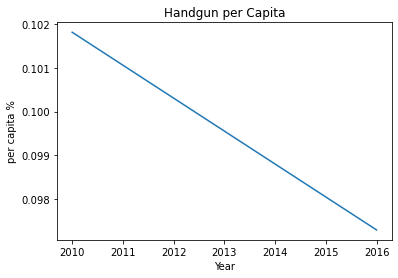

In [161]:
#Plot on a graph

years = [2010, 2016]
handgun_per_capita = [per_capita_handgun_2010,per_capita_handgun_2016]

plt.plot(years, handgun_per_capita)
plt.title('Handgun per Capita')
plt.xlabel('Year')
plt.ylabel('per capita %')
plt.show()

In [162]:
#checking gun per capita for long gun in 2010 and 2016
per_capita_longun_2010 = cal_gun_per_capita_2010('long_gun_x')
per_capita_longun_2016 = cal_gun_per_capita_2016('long_gun_x')

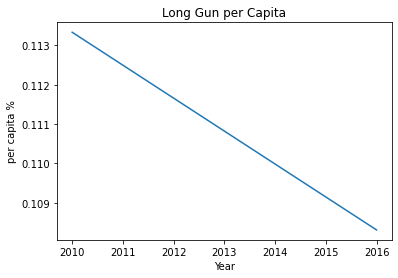

In [164]:
#Plot on a graph

years = [2010, 2016]
handgun_per_capita = [per_capita_longun_2010,per_capita_longun_2016]

plt.plot(years, handgun_per_capita)
plt.title('Long Gun per Capita')
plt.xlabel('Year')
plt.ylabel('per capita %')
plt.show()

In [165]:
#checking gun per capita for long gun in 2010m and 2016
per_capita_2010 = cal_gun_per_capita_2010('totals_x') 
per_capita_2016 = cal_gun_per_capita_2016('totals_x') 

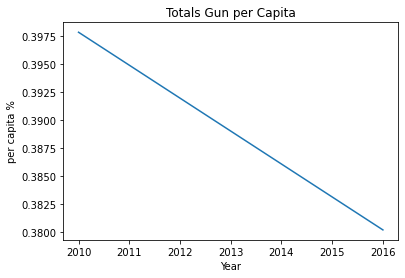

In [166]:
#Plot on a graph

years = [2010, 2016]
handgun_per_capita = [per_capita_2010,per_capita_2016]

plt.plot(years, handgun_per_capita)
plt.title('Totals Gun per Capita')
plt.xlabel('Year')
plt.ylabel('per capita %')
plt.show()

In [167]:
#answers to research question

per_capita_handgun_2010
per_capita_handgun_2016
per_capita_longun_2010
per_capita_longun_2016
per_capita_2010
per_capita_2016

0.38018325424146615

Answers:
1. Handgun per capita 2010 - 0.10181163269855696
2. Handgun per capita 2016 - 0.09729959939412307
3. Long gun per capita 2010 - 0.11333370623928656
4. Long gun per capita 2016 - 0.10831104386257531
5. All guns per capita 2010 - 0.3978133320178106
6. All guns per capita 2016 - 0.38018325424146615

### Research Question 2 - What has been the trends of gun purchases (handgun,long_gun,totals) over the years?

In [168]:
#check all months we have to do trend
gun_df_new.month.nunique()

227

In [169]:
#from what I saw, I will trend 2017, 2016, and 2015 data
#create new year columns
gun_df_new['year'] = pd.DatetimeIndex(gun_df_new['month']).year

#check to confirm
gun_df_new.head()

,month,state,handgun,long_gun,totals,year
0,2017-09-01,Alabama,5734.0,6320.0,32019,2017
1,2017-09-01,Alaska,2320.0,2930.0,6303,2017
2,2017-09-01,Arizona,11063.0,7946.0,28394,2017
3,2017-09-01,Arkansas,4347.0,6063.0,17747,2017
4,2017-09-01,California,37165.0,24581.0,123506,2017


The table above shows us our resulting values after adding a year column to our gun_df_new dataframe.

In [170]:
gun_df_new.year.nunique()

20

In [220]:
gun_trends = gun_df_new.groupby('year').sum(['handgun','long_gun','totals']).reset_index();
gun_trends.dtypes

year          int64
handgun     float64
long_gun    float64
totals        int64
dtype: object

In [221]:
#conver year to str
gun_trends.year = gun_trends.year.astype(str)
gun_trends.dtypes

year         object
handgun     float64
long_gun    float64
totals        int64
dtype: object

In [222]:
def plot_graph(col,col_name):
    plt.figure(figsize=(20, 8))
    plt.plot(gun_trends['year'],gun_trends[col])
    plt.title('Trends of ' + col_name + ' purchases by Year', fontsize = 25)
    plt.xlabel('Year')
    plt.ylabel('Gun Purchases')
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.legend([col_name], loc = "upper right", fontsize = 18)
    return plt.show()

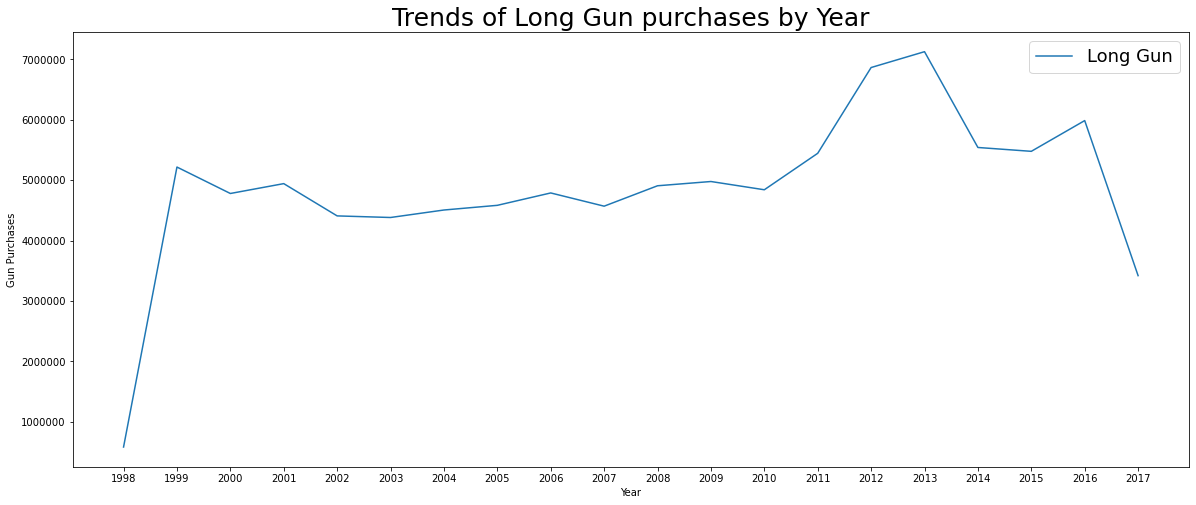

In [223]:
plot_graph('long_gun', "Long Gun")

From the graph above, it can be inferred that the rate at which people bought long gun has a slopy rise and drops, which means the rise is not liquid and same as the drops. But in conclusion, the rise of long gun purchases from 1998 to 1999 and also the drop of long gun purchases from 2016 to 2017 is very evident.

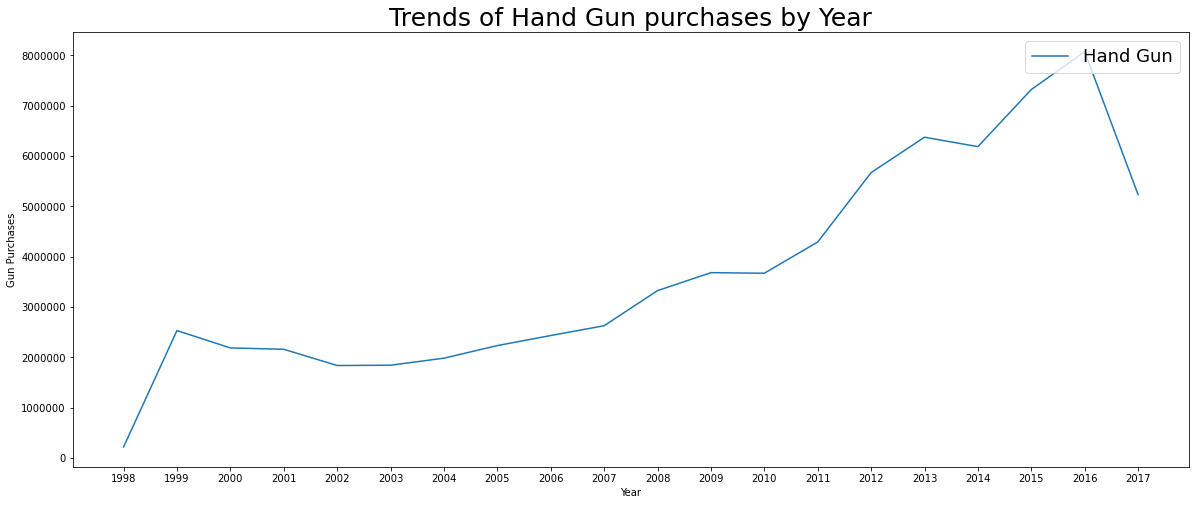

In [224]:
plot_graph('handgun', "Hand Gun")

You can infer from the graph above that the rate at which people bought hand gun has a steady rise across all years. Which essentially means people kept on buying hand guns as the years came by. Also you can see from the graph a visible drop in hand gun purchases from 2016 to 2017.

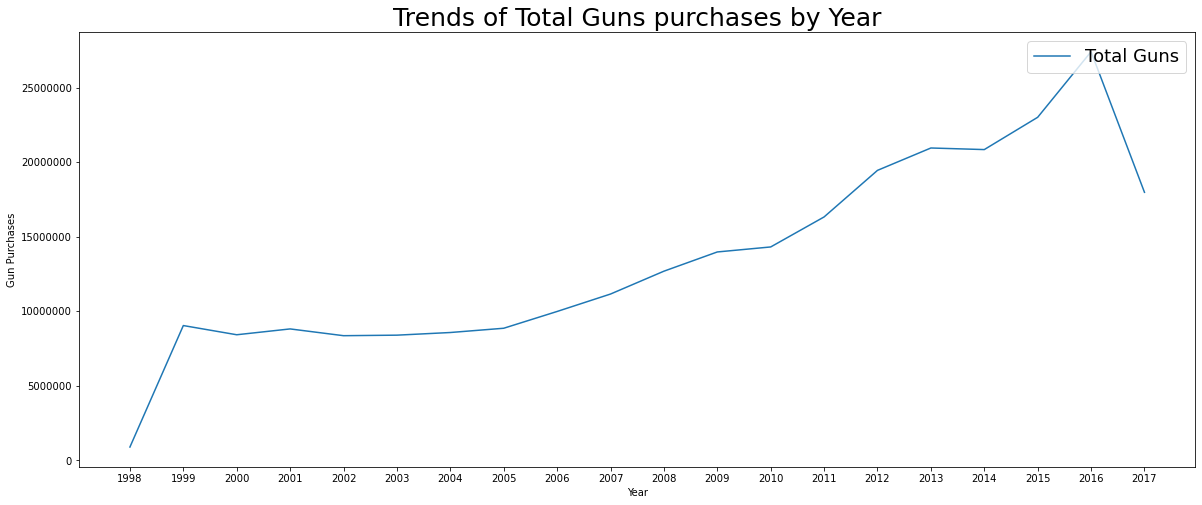

In [225]:
plot_graph('totals', "Total Guns")

This graph is almost the same as the graph for hand gun purchases across the years except that from the graph the rise in gun purchases between 2007 to 2014 is much smoother than the former. Also you can see from the graph a visible drop in gun purchases from 2016 to 2017.

### Research Question 3 - What is the trend of Guns across 2017,2016 and 2015 ?

In [226]:
gun_2017 = gun_df_new.query('year == 2017')
gun_2017 = gun_2017[['month','state','handgun','long_gun','totals']]
gun_2016 = gun_df_new.query('year == 2016')
gun_2016 = gun_2016[['month','state','handgun','long_gun','totals']]
gun_2015 = gun_df_new.query('year == 2015')
gun_2015 = gun_2015[['month','state','handgun','long_gun','totals']]

In [227]:
guns = ['handgun','long_gun','totals']
sales_2017 = [gun_2017.handgun.sum().astype(int),gun_2017.long_gun.sum().astype(int),gun_2017.totals.sum().astype(int)]

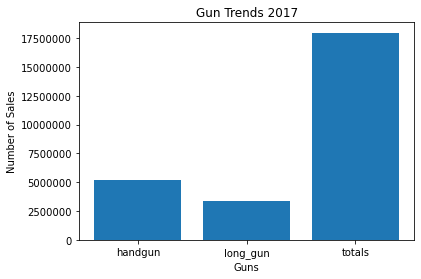

In [239]:
plt.bar(guns, sales_2017)
plt.title('Gun Trends 2017')
plt.xlabel('Guns')
plt.ylabel('Number of Sales')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [240]:
sales_2016 = [gun_2016.handgun.sum().astype(int),gun_2016.long_gun.sum().astype(int),gun_2016.totals.sum().astype(int)]

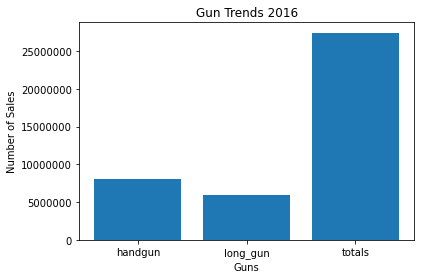

In [241]:
plt.bar(guns, sales_2016)
plt.title('Gun Trends 2016')
plt.xlabel('Guns')
plt.ylabel('Number of Sales')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [242]:
sales_2015 = [gun_2015.handgun.sum().astype(int),gun_2015.long_gun.sum().astype(int),gun_2015.totals.sum().astype(int)]

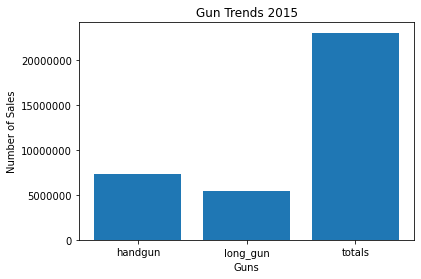

In [243]:
plt.bar(guns, sales_2015)
plt.title('Gun Trends 2015')
plt.xlabel('Guns')
plt.ylabel('Number of Sales')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

In conclusion, I have been able to analyze both the census and gun data .The census data had some relevant variables that I could have been explored a lot further. Also the census and gun data had some similar variables such as date, month which helped me perform some analysis. My first question was to analyze how much of census popualtion had hand guns, long guns and all type of guns. This is where I dived into the data and provided answers in my presentation. Also I went ahead to find some trends and relationships between the years and how much gun purchases being it handgun or long gun across the years. You can infer from the graph that the rate at which people bought hand gun rose steadily whilst the rate at which people bought long gun has a slopy rise amd drops, but in conclusion all gun purchases droppped visibly from 2016 to 2017. Gun registration per capita in 2010 equal to 0.398% and  in 2017, gun registration per capita is equivalent to 0.380%.

Some limitations I faced was that due to the number of states, my x axis labels was clumsy even after I expanded the graph so I had to remove them completely. Also there were missing data for some states in the census data which led to drop them in the gun data.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [518]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1